<a href="https://colab.research.google.com/github/Nsralla/case-study/blob/main/caseStudy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np
# load dataset titanic
df = sns.load_dataset('titanic')

data set has been loaded


1- data exploring

In [ ]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


data set structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Missing values


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

Summarizing the Dataset’s Statistics and Gaining Insights

In [ ]:
# Display summary statistics of the dataset's numerical features
df.describe()

# For non-numeric data
df.describe(include=['O'])


,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


To handle missing values for Age feature

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df['age'] = imputer.fit_transform(df[['age']])
# Check the number of missing values in the age column
missing_age = df['Age'].isnull().sum()
print(f"Number of missing values in 'Age': {missing_age}")


Number of missing values in 'Age': 0


display some info about the age after handling the missing values

In [ ]:
age_summary = df['age'].describe()
print(f"Maximum Age: {age_summary['max']}")
print(f"Minimum Age: {age_summary['min']}")
print(f"Average (Mean) Age: {age_summary['mean']}")
print(f"25% Percentile of Age: {age_summary['25%']}")
print(f"75% Percentile of Age: {age_summary['75%']}")


Maximum Age: 80.0
Minimum Age: 0.42
Average (Mean) Age: 29.315151856017994
25% Percentile of Age: 22.0
75% Percentile of Age: 35.0


FOR Embarked, and Embark_town, let's remove them

In [ ]:
df.dropna(subset=['embarked'], inplace=True)
df.dropna(subset=['embark_town'], inplace=True)
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

deck    688
dtype: int64

For deck feature I will use the following method:

In [ ]:
# Loop through each unique class in 'Pclass'
for pclass in df['pclass'].unique():
    # Find the most common 'Deck' for this 'Pclass'
    mode_deck = df.loc[df['pclass'] == pclass, 'deck'].mode()[0]

    # Apply the mode 'Deck' for missing values in this class
    df.loc[(df['pclass'] == pclass) & (df['deck'].isnull()), 'deck'] = mode_deck
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

Print some info about the deck feature

In [ ]:
# Print the count of values for each deck
print(df['deck'].value_counts())
# Print the percentage of values for each deck
print(df['deck'].value_counts(normalize=True) * 100)
# Print a summary of the deck feature
print(df['deck'].describe())



F    660
C    100
B     45
D     33
E     32
A     15
G      4
Name: deck, dtype: int64
F    74.240720
C    11.248594
B     5.061867
D     3.712036
E     3.599550
A     1.687289
G     0.449944
Name: deck, dtype: float64
count     889
unique      7
top         F
freq      660
Name: deck, dtype: object


Handling outliers for 'Fare'

count    889.000000
mean      23.956061
std       20.414997
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max       65.656300
Name: fare, dtype: float64


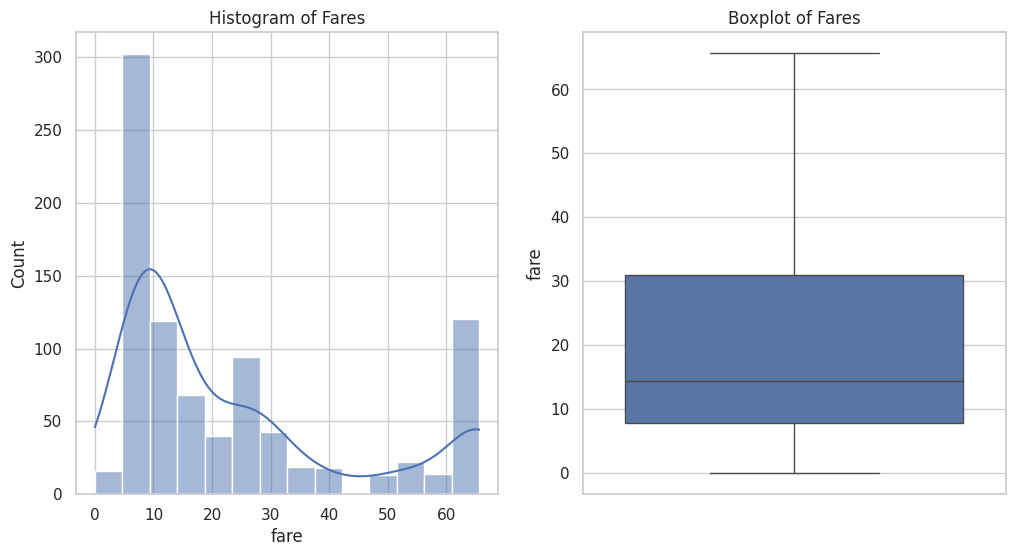

In [ ]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

# Cap the outliers
fare_ceiling = Q3 + 1.5 * IQR
df['fare'] = df['fare'].clip(upper=fare_ceiling)
# Print updated summary statistics for the 'Fare' feature
print(df['fare'].describe())

import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Creating a figure to hold the plots
plt.figure(figsize=(12, 6))

# Creating a subplot for the histogram
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(df['fare'], kde=True)
plt.title('Histogram of Fares')

# Creating a subplot for the boxplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(y=df['fare'])
plt.title('Boxplot of Fares')

# Show the plots
plt.show()



Analyze the relevance of each feature for your machine learning task by using
feature selection techniques

   survived  pclass   age  sibsp  parch     fare   Age  sex_male  embarked_Q  \
0         0       3  22.0      1      0   7.2500  22.0         1           0   
1         1       1  38.0      1      0  65.6563  38.0         0           0   
2         1       3  26.0      0      0   7.9250  26.0         0           0   
3         1       1  35.0      1      0  53.1000  35.0         0           0   
4         0       3  35.0      0      0   8.0500  35.0         1           0   

   embarked_S  ...  deck_G  alone_True  alive_yes  adult_male_True  \
0           1  ...       0           0          0                1   
1           0  ...       0           0          1                0   
2           1  ...       0           1          1                0   
3           1  ...       0           0          1                0   
4           1  ...       0           1          0                1   

   class_Second  class_Third  who_man  who_woman  embark_town_Queenstown  \
0             0       

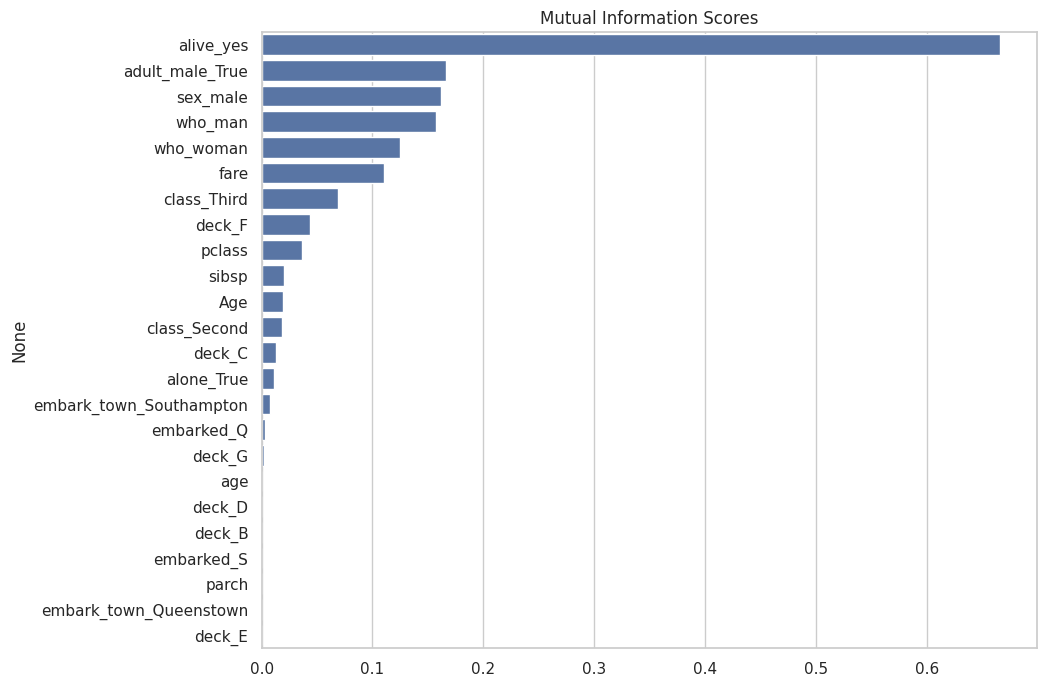

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Correct any column name case issues to match your DataFrame exactly
titanic_df = pd.get_dummies(df, columns=['sex', 'embarked', 'deck', 'alone', 'alive', 'adult_male', 'class','who','embark_town'], drop_first=True)

# Double-check the encoding result
print(titanic_df.head())

# Separate features and target
X = titanic_df.drop('survived', axis=1)
y = titanic_df['survived']

# Compute mutual information
mi_scores = mutual_info_classif(X, y, random_state=42)

# Make results easier to interpret
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Plot the MI scores
plt.figure(figsize=(10, 8))
sns.barplot(x=mi_scores.values, y=mi_scores.index)
plt.title('Mutual Information Scores')
plt.show()


columns after enconding


In [ ]:
import pandas as pd

# Assuming titanic_df is your DataFrame
print(titanic_df.columns)


Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'Age',
       'sex_male', 'embarked_Q', 'embarked_S', 'deck_B', 'deck_C', 'deck_D',
       'deck_E', 'deck_F', 'deck_G', 'alone_True', 'alive_yes',
       'adult_male_True', 'class_Second', 'class_Third', 'who_man',
       'who_woman', 'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')


alive_yes          0.665815
adult_male_True    0.161056
who_man            0.158092
who_woman          0.140178
sex_male           0.122643
fare               0.121798
deck_F             0.078555
class_Third        0.069991
Age                0.034663
pclass             0.028552
dtype: float64


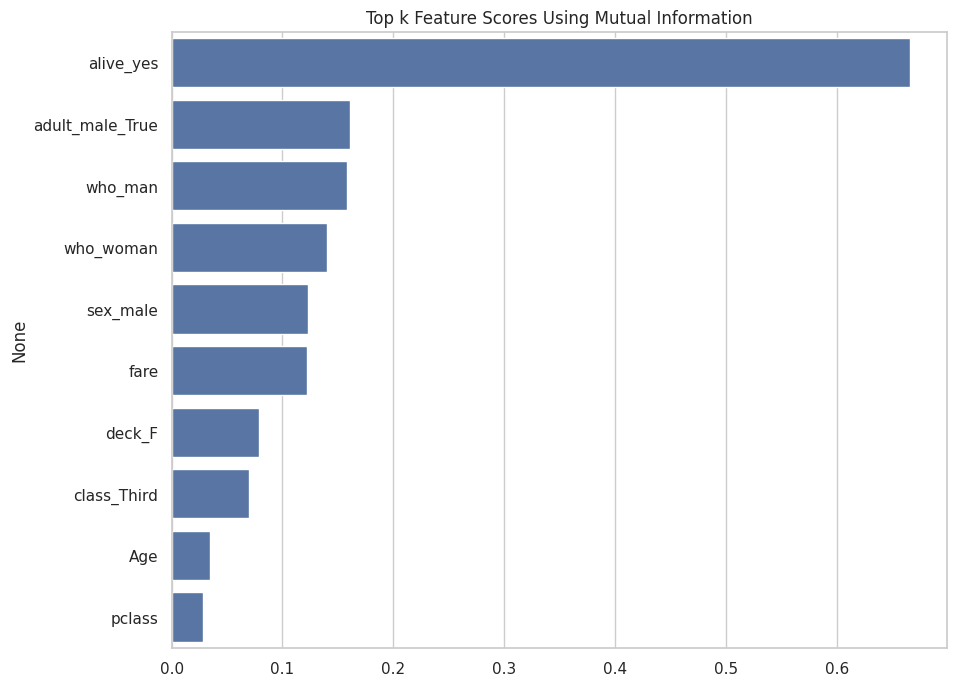

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Define the number of features you want to keep, based on their mutual information
k = 10  # For example, to select the top 10 features

# Create the SelectKBest with mutual_info_classif as the score function
select_k_best = SelectKBest(score_func=mutual_info_classif, k=k)

# Fit to the data and then transform it
X_new = select_k_best.fit_transform(X, y)

# Get the scores assigned to each feature
scores = select_k_best.scores_

# Make results easier to interpret by creating a Series with feature names and scores
feature_scores = pd.Series(scores, index=X.columns).sort_values(ascending=False)

# Now you can plot or print the scores
print(feature_scores.head(k))  # This will print the top k features

# For plotting, you might use seaborn or matplotlib as before
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_scores.head(k).values, y=feature_scores.head(k).index)
plt.title('Top k Feature Scores Using Mutual Information')
plt.show()


Split the dataset into training and testing subsets to evaluate the performance of your machine learning models.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# This will split the data into 80% training and 20% testing.
print(f"Training features size: {X_train.shape}")
print(f"Testing features size: {X_test.shape}")
print(f"Training labels size: {y_train.shape}")
print(f"Testing labels size: {y_test.shape}")


Training features size: (711, 24)
Testing features size: (178, 24)
Training labels size: (711,)
Testing labels size: (178,)


In [ ]:
titanic_df.head(10)

,survived,pclass,age,sibsp,parch,fare,Age,sex_male,embarked_Q,embarked_S,...,deck_G,alone_True,alive_yes,adult_male_True,class_Second,class_Third,who_man,who_woman,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,22.0,1,0,1,...,0,0,0,1,0,1,1,0,0,1
1,1,1,38.0,1,0,65.6563,38.0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,26.0,0,0,1,...,0,1,1,0,0,1,0,1,0,1
3,1,1,35.0,1,0,53.1000,35.0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
4,0,3,35.0,0,0,8.0500,35.0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
5,0,3,28.0,0,0,8.4583,28.0,1,1,0,...,0,1,0,1,0,1,1,0,1,0
6,0,1,54.0,0,0,51.8625,54.0,1,0,1,...,0,1,0,1,0,0,1,0,0,1
7,0,3,2.0,3,1,21.0750,2.0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
8,1,3,27.0,0,2,11.1333,27.0,0,0,1,...,0,0,1,0,0,1,0,1,0,1
9,1,2,14.0,1,0,30.0708,14.0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


Standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create the scaler object
scaler = StandardScaler()

# List of numerical features to scale
numerical_features = ['age', 'fare', 'sibsp', 'parch']

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])


Visulaize features after scaling

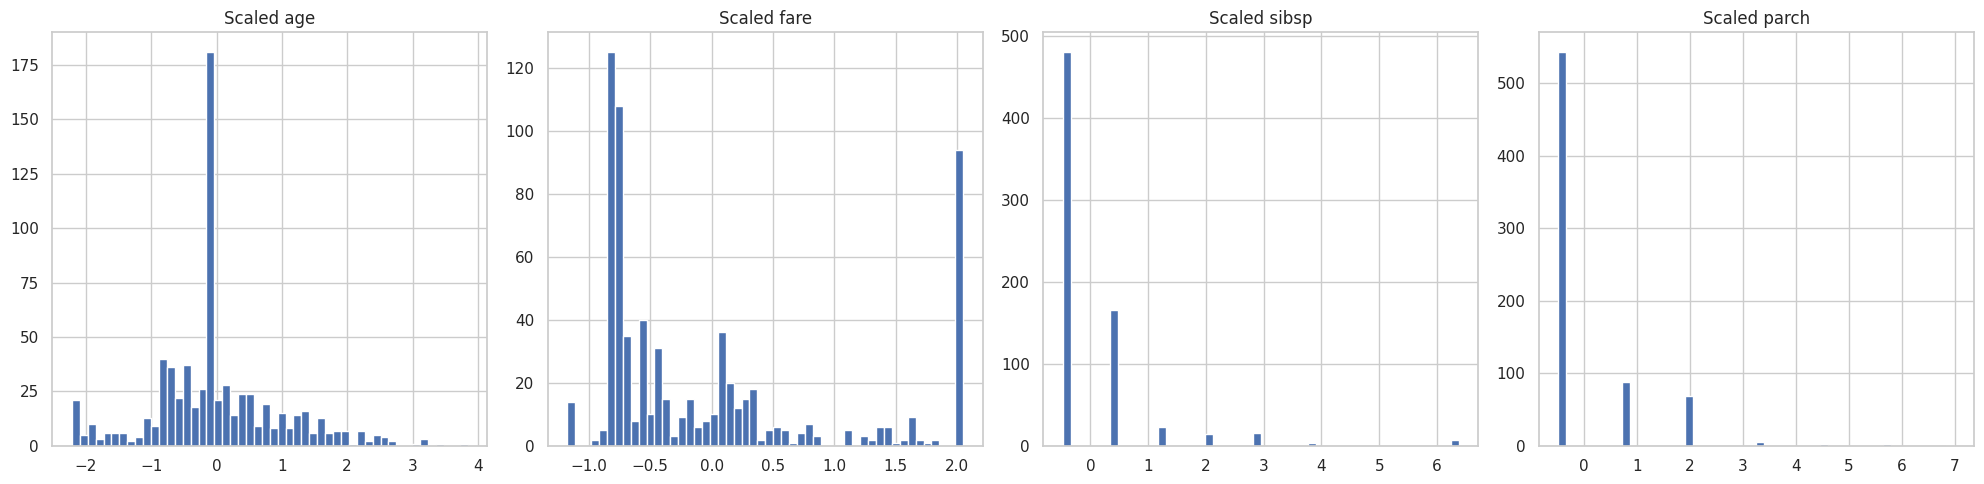

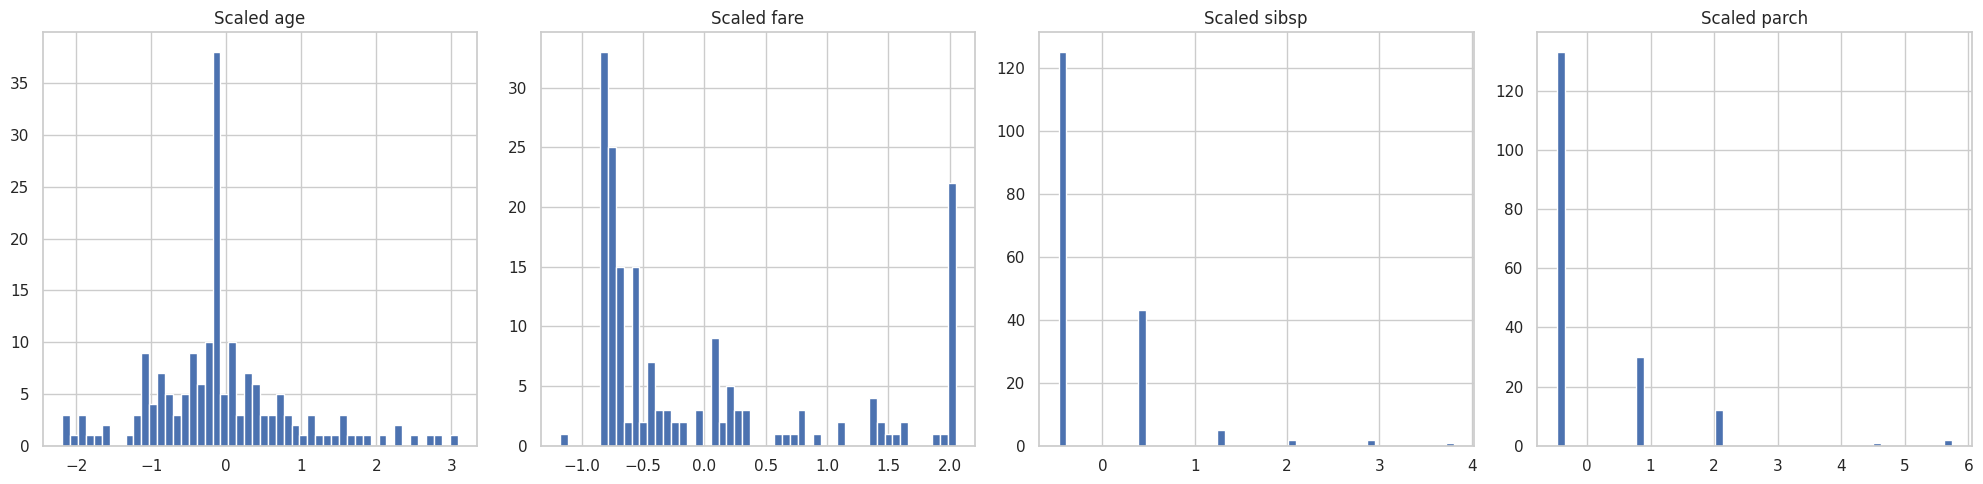

In [ ]:
import matplotlib.pyplot as plt

# Function to create histograms for scaled data
def plot_scaled_data(df, features):
    fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(20, 5))
    for i, col in enumerate(features):
        ax = axes[i]
        df[col].hist(ax=ax, bins=50)
        ax.set_title(f'Scaled {col}')
    plt.tight_layout()
    plt.show()

# Visualize the scaled training data
plot_scaled_data(X_train_scaled, numerical_features)

# Visualize the scaled testing data
plot_scaled_data(X_test_scaled, numerical_features)


Apply suitable dimensionality reduction techniques to reduce the size of the
 data while preserving important information

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled[numerical_features])
X_test_pca = pca.transform(X_test_scaled[numerical_features])
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


Explained variance ratio: [0.44601494 0.28257126 0.14719834 0.12421546]


In [ ]:
# Print the PCA components
print("PCA components (rows: components, columns: features):")
print(pca.components_)

# Create a DataFrame for better readability
import pandas as pd
components_df = pd.DataFrame(pca.components_, columns=numerical_features)
print(components_df)


PCA components (rows: components, columns: features):
[[-0.24143466  0.46852015  0.61453601  0.58697842]
 [ 0.81596416  0.57061631 -0.08873441 -0.02693917]
 [ 0.2633325  -0.39494219 -0.36181296  0.80235157]
 [ 0.45449729 -0.54672348  0.695387   -0.10470229]]
        age      fare     sibsp     parch
0 -0.241435  0.468520  0.614536  0.586978
1  0.815964  0.570616 -0.088734 -0.026939
2  0.263332 -0.394942 -0.361813  0.802352
3  0.454497 -0.546723  0.695387 -0.104702


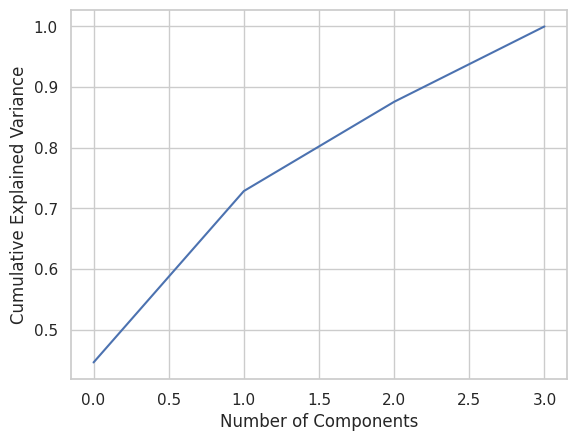

In [ ]:
pca = PCA().fit(X_train_scaled[numerical_features])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


To identify the specific components (features) that are contributing most significantly to the explained variance in your PCA, you need to examine the PCA loadings. The loadings are the coefficients of the linear combinations that PCA uses to construct the principal components from the original features.

Here's how you can examine the PCA loadings:

In [ ]:
from sklearn.decomposition import PCA

# Assuming X_train_scaled is already defined and scaled
pca = PCA()
pca.fit(X_train_scaled[numerical_features])
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio
pca_components = pca.components_
pca_components


array([[-0.24143466,  0.46852015,  0.61453601,  0.58697842],
       [ 0.81596416,  0.57061631, -0.08873441, -0.02693917],
       [ 0.2633325 , -0.39494219, -0.36181296,  0.80235157],
       [ 0.45449729, -0.54672348,  0.695387  , -0.10470229]])

        age      fare     sibsp     parch
0 -0.241435  0.468520  0.614536  0.586978
1  0.815964  0.570616 -0.088734 -0.026939
2  0.263332 -0.394942 -0.361813  0.802352
3  0.454497 -0.546723  0.695387 -0.104702


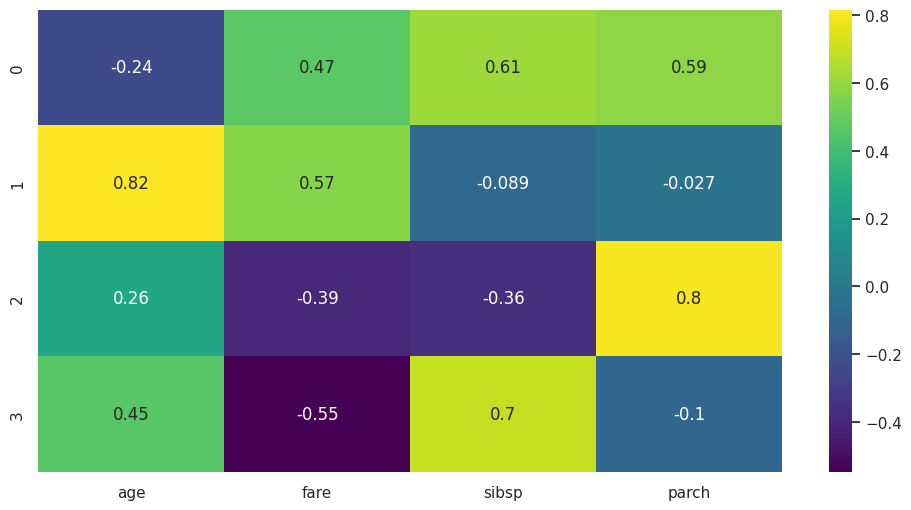

In [ ]:
components_df = pd.DataFrame(pca.components_, columns=numerical_features)
print(components_df)

plt.figure(figsize=(12, 6))
sns.heatmap(components_df, cmap='viridis', annot=True)
plt.show()


Random forest after splitting data to train and test

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9943820224719101
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       109
           1       0.99      1.00      0.99        69

    accuracy                           0.99       178
   macro avg       0.99      1.00      0.99       178
weighted avg       0.99      0.99      0.99       178



train the model before applying anything

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Titanic dataset
df = sns.load_dataset('titanic')
df.dropna(subset=['survived'], inplace=True)
titanic_df = pd.get_dummies(df, columns=['sex', 'embarked', 'deck', 'alone', 'alive', 'adult_male', 'class','who','embark_town'], drop_first=True)


# Select features and target variable
X = titanic_df.drop(columns=['survived'])
y = titanic_df['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")


ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values